<a href="https://colab.research.google.com/github/laumr/data-science/blob/main/Regresion_1_Laura_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def to_binary(X_train_, X_test_, cats):
  X_train =  X_train_.copy()
  X_test = X_test_.copy()
  ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
  # train
  X_train_bin = pd.DataFrame(ohe.fit_transform(
      X_train[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_train.index)
  X_train_bin = X_train_bin.join(X_train[list(set(X_train.columns)  - set(cats))])
  # test
  X_test_bin = pd.DataFrame(ohe.transform(X_test[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_test.index)
  X_test_bin = X_test_bin.join(X_test[list(set(X_test.columns)  - set(cats))])
  X_test_bin = X_test_bin[X_train_bin.columns]
  return X_train_bin, X_test_bin

In [ ]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


<Axes: xlabel='age', ylabel='Count'>

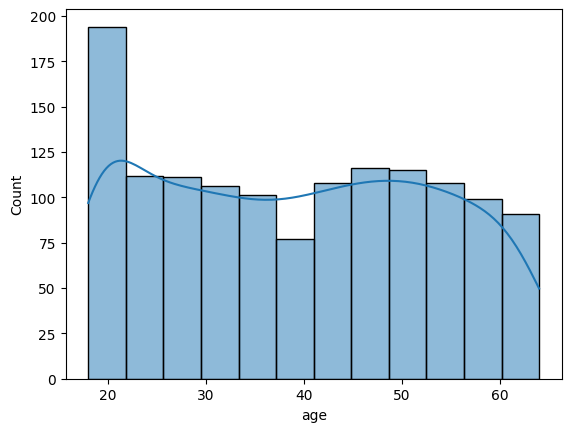

In [ ]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

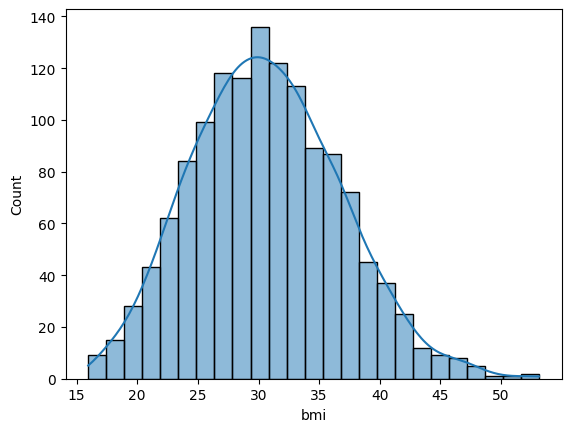

In [ ]:
sns.histplot(df['bmi'], kde=True)

<Axes: xlabel='charges', ylabel='Count'>

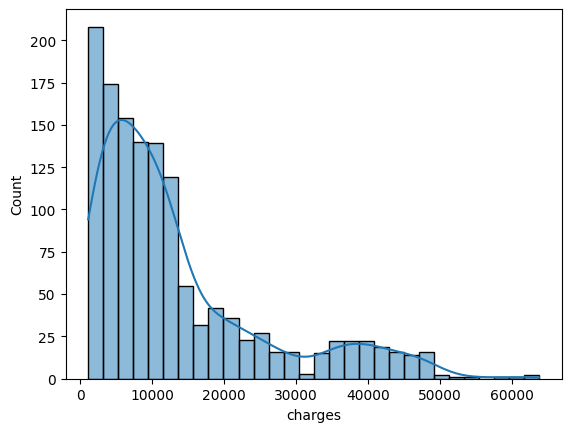

In [ ]:
sns.histplot(df['charges'], kde=True)

<Axes: >

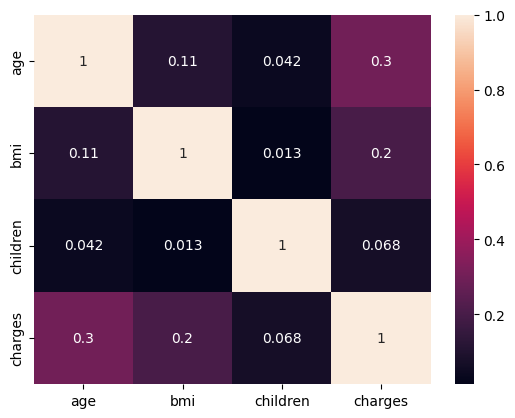

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
y = df['charges']

print(smf.ols(formula='y ~ age + sex + bmi +region + smoker', data = df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     566.0
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        06:43:15   Log-Likelihood:                -13554.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1330   BIC:                         2.717e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.156e+04    

In [ ]:
X= df.drop(columns='charges')
y= df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cats = ['sex','smoker','region']
X_train_bin, X_test_bin = to_binary(X_train, X_test, cats)

model = LinearRegression()
model.fit(X_train_bin, y_train)
y_pred = model.predict(X_test_bin)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

MSE: 33596915.85
R2: 0.78
